In [31]:
import pandas as pd
from pandas_profiling import ProfileReport
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
file = 'C:/Users/blgai/OneDrive/Documents/School/SMU/Courses/Spring 2021/Quantifying The World/Case Study 12/Data/HIGGS.csv.gz'
df = pd.read_csv(file, compression='gzip', header=None, sep=',', quotechar='"')

In [6]:
#sample 10% of the data for EDA
df = df.sample(frac=0.1)
#save to disk for later use
df.to_csv(index=False)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
7252644,0.0,0.703487,1.126828,1.533498,1.612191,-0.686824,2.520115,0.091076,0.631040,0.000000,...,0.424279,1.301662,3.101961,0.736185,0.871225,1.341578,0.798229,0.843056,0.710939,0.836988
4939926,0.0,0.346253,-1.488278,1.698292,1.255142,-1.381131,0.730110,-0.029732,0.393767,2.173076,...,1.914200,-0.882022,0.000000,0.893205,0.878054,0.979780,1.015537,0.982847,0.767631,0.766695
523181,0.0,0.607407,0.863856,-1.355770,0.726730,0.384428,1.671923,0.301995,1.076203,2.173076,...,-0.754999,-0.438090,0.000000,0.949210,0.902641,0.988216,1.160704,1.807028,1.305619,1.163490
5034882,1.0,0.727827,1.378112,-0.299311,0.327077,-0.223501,0.572270,1.717033,0.249075,0.000000,...,-0.587601,0.372185,0.000000,0.822157,0.935620,1.000111,0.838592,0.643400,0.834447,0.718480
7439470,1.0,1.407523,0.712891,0.464281,0.964935,0.452420,2.424294,1.840812,-1.420808,0.000000,...,-0.371900,-0.123455,3.101961,1.108657,1.199861,0.997514,1.113583,0.859703,0.988944,0.947602


In [8]:
len(df)

1100000

In [33]:
#How many missing values do we have
len(df.index)-df.count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64

In [41]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,...,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06
mean,5.303836e-01,9.916965e-01,-1.607738e-03,-1.381148e-03,9.984291e-01,-1.773743e-04,9.916215e-01,-3.143589e-04,1.704469e-04,1.001834e+00,...,-1.241993e-03,-1.470547e-04,9.983451e-01,1.034344e+00,1.024680e+00,1.050593e+00,1.009769e+00,9.736988e-01,1.033255e+00,9.598635e-01
std,4.990762e-01,5.646472e-01,1.008542e+00,1.006325e+00,6.008426e-01,1.005733e+00,4.752933e-01,1.008397e+00,1.005175e+00,1.027964e+00,...,1.007622e+00,1.005835e+00,1.399654e+00,6.764091e-01,3.813462e-01,1.642111e-01,3.973175e-01,5.267084e-01,3.656799e-01,3.129180e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,1.170012e-03,-1.743938e+00,1.375940e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,9.484348e-02,2.346630e-01,1.654245e-01,1.574726e-01,4.975749e-02,3.342950e-01,3.588244e-01
25%,0.000000e+00,5.907533e-01,-7.392965e-01,-8.741503e-01,5.767899e-01,-8.694113e-01,6.796340e-01,-6.872450e-01,-8.675418e-01,0.000000e+00,...,-7.150230e-01,-8.703690e-01,0.000000e+00,7.906138e-01,8.461264e-01,9.857513e-01,7.675770e-01,6.743566e-01,8.193964e-01,7.704815e-01
50%,1.000000e+00,8.533714e-01,-2.002093e-03,-7.958863e-04,8.916174e-01,-1.252148e-03,8.953689e-01,-2.005896e-03,2.378375e-03,1.086538e+00,...,-4.606903e-04,3.934671e-04,0.000000e+00,8.951328e-01,9.505155e-01,9.897761e-01,9.166852e-01,8.733877e-01,9.471424e-01,8.719261e-01
75%,1.000000e+00,1.238057e+00,7.352923e-01,8.687745e-01,1.292955e+00,8.694978e-01,1.171473e+00,6.852136e-01,8.666495e-01,2.173076e+00,...,7.116032e-01,8.704956e-01,3.101961e+00,1.024710e+00,1.083126e+00,1.020304e+00,1.142072e+00,1.138699e+00,1.140833e+00,1.059655e+00
max,1.000000e+00,1.003384e+01,2.434868e+00,1.743236e+00,1.060782e+01,1.743257e+00,8.848616e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,3.355602e+01,1.673047e+01,7.992739e+00,1.227358e+01,1.306333e+01,1.097622e+01,7.458594e+00


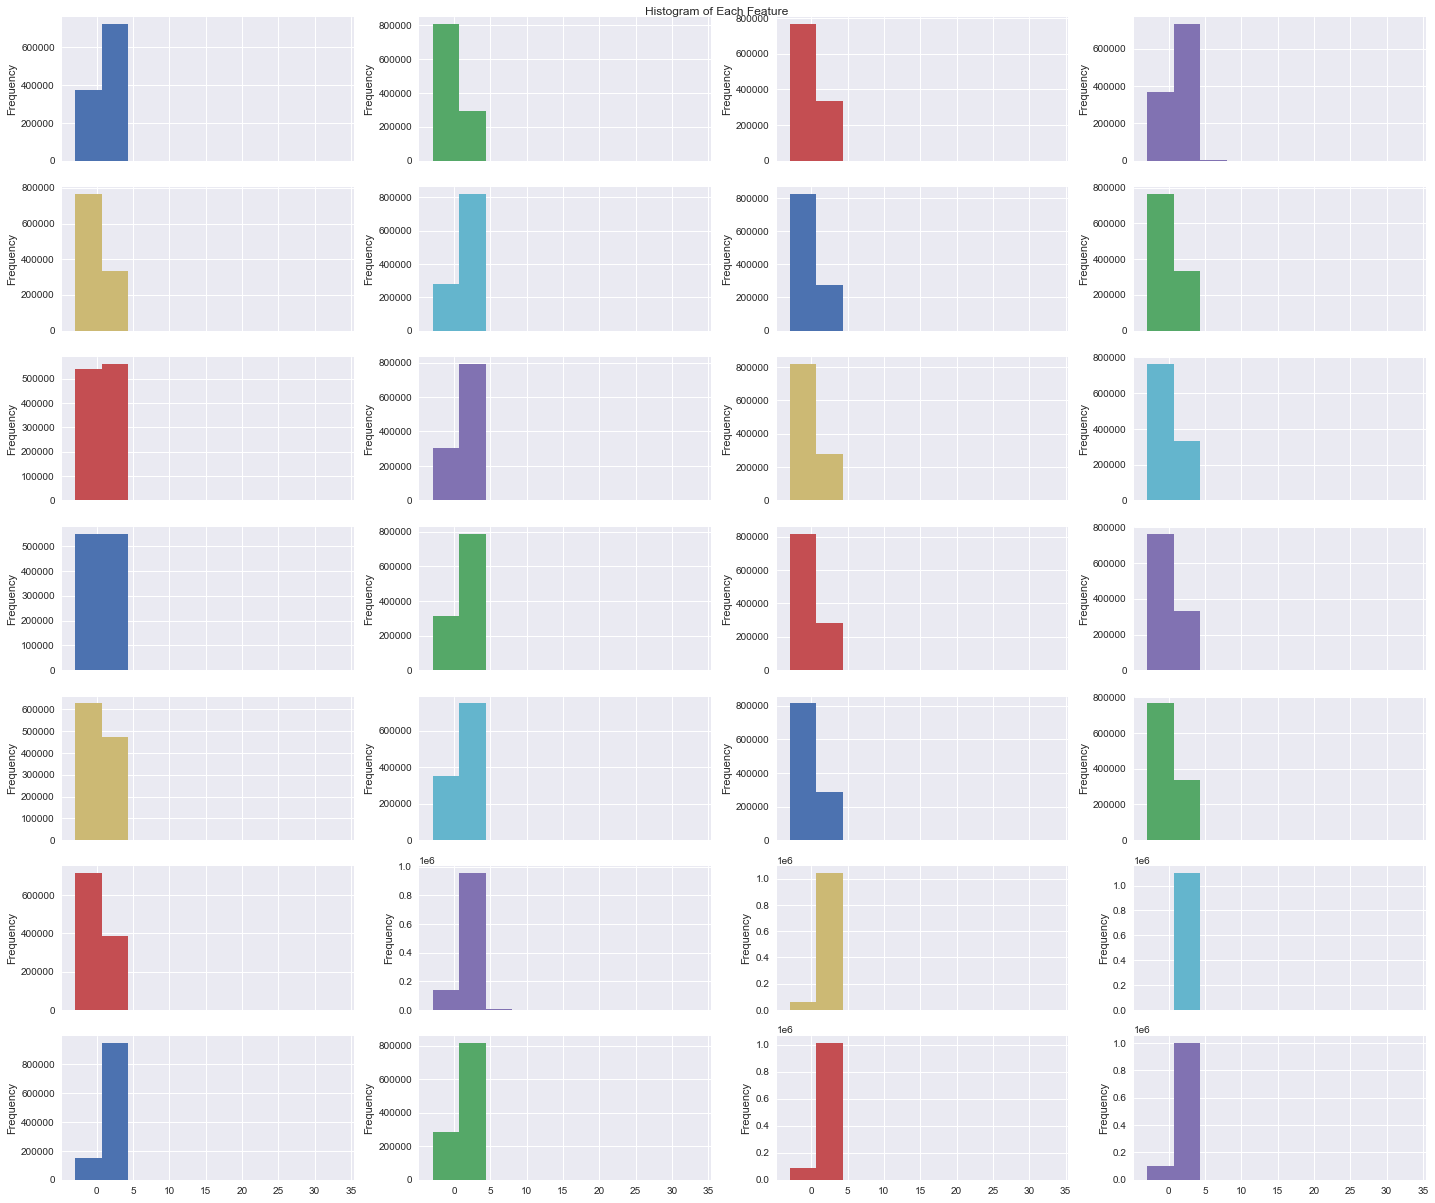

In [36]:
#plot histogram of each feature
plt.style.use('seaborn')

df.iloc[:, 1:29].plot.hist(figsize=(20,17), subplots=True, legend=False, layout=(7, 4), title="Histogram of Each Feature");
plt.tight_layout()

<AxesSubplot:>

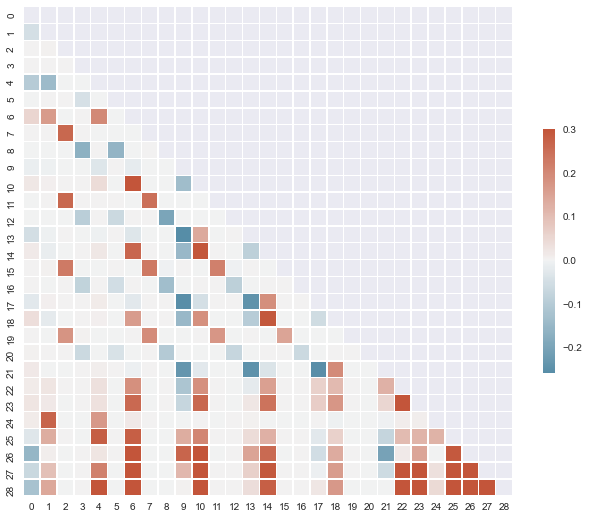

In [32]:
#plot correlation plot
corr = df.corr()
#mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})